
# **Machine Problem 4: K-Means Clustering on Customer Segmentation Dataset**

- **Name:** Hallig, Siera Q.
- **Y&S:** BSCS 3B IS
- **Course:** CSST 102 | Basic Machine Learning
- **Topic:** Topic 3: Unsupervised Learning Techniques




First few rows:
   CustomerID  Age  AnnualIncome  SpendingScore
0           1   22         15000             39
1           2   35         40000             81
2           3   26         30000             77
3           4   40         50000             40
4           5   55        100000              6

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   CustomerID     20 non-null     int64
 1   Age            20 non-null     int64
 2   AnnualIncome   20 non-null     int64
 3   SpendingScore  20 non-null     int64
dtypes: int64(4)
memory usage: 768.0 bytes

Statistical Summary:
       CustomerID        Age  AnnualIncome  SpendingScore
count    20.00000  20.000000      20.00000      20.000000
mean     10.50000  35.800000   45600.00000      58.500000
std       5.91608   8.538458   19129.47574      22.361857
min       1.00000  22.000000  

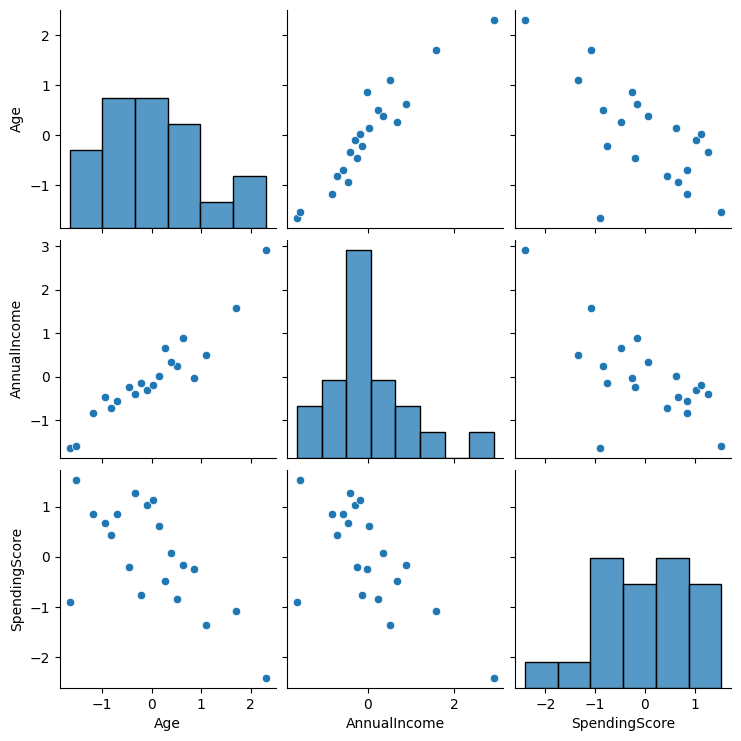


Correlation Matrix:
                    Age  AnnualIncome  SpendingScore
Age            1.000000      0.940392      -0.667075
AnnualIncome   0.940392      1.000000      -0.685070
SpendingScore -0.667075     -0.685070       1.000000


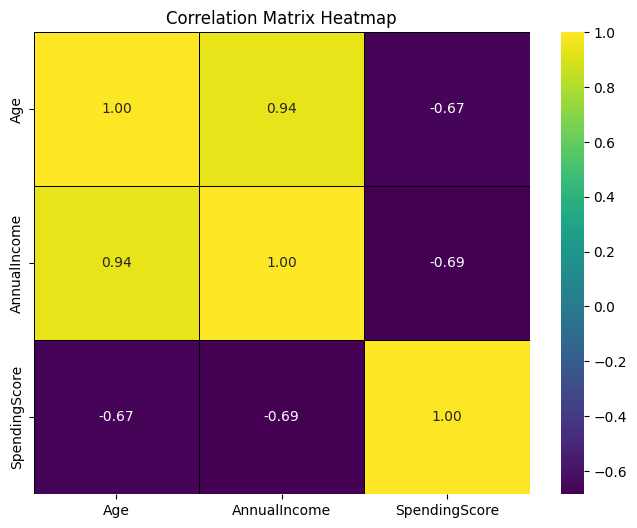

In [1]:
#@title # **1. Data Exploration and Preprocessing**

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('/content/customer_segmentation.csv')

# Display the first few rows
print("First few rows:")
print(data.head())

# Show basic info about the dataset
print("\nDataset Info:")
data.info()

# Show statistical summary
print("\nStatistical Summary:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Drop rows with missing values
data.dropna(inplace=True)

# Select features for scaling
features_to_scale = data[['Age', 'AnnualIncome', 'SpendingScore']]

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features_to_scale)

# Create a DataFrame for scaled features
scaled_df = pd.DataFrame(scaled_data, columns=['Age', 'AnnualIncome', 'SpendingScore'])

# Visualize the scaled features with a pair plot
print("\nPair Plot of Scaled Features:")
sns.pairplot(scaled_df)
plt.show()

# Calculate and display the correlation matrix
print("\nCorrelation Matrix:")
correlation_matrix = scaled_df.corr()
print(correlation_matrix)

# Plot heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=.5, linecolor='black')
plt.title('Correlation Matrix Heatmap')
plt.show()

First few rows of the dataset:
   CustomerID  Age  AnnualIncome  SpendingScore
0           1   22         15000             39
1           2   35         40000             81
2           3   26         30000             77
3           4   40         50000             40
4           5   55        100000              6


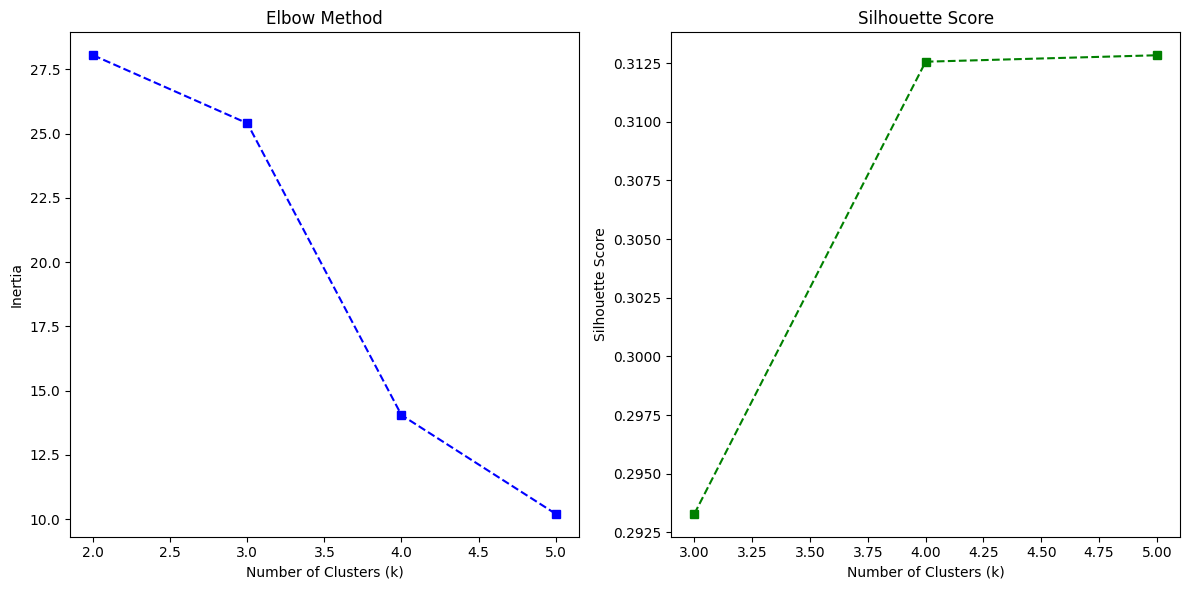

In [2]:
#@title # **2. Model Development**

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv('/content/customer_segmentation.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Preprocessing: Select features for scaling
features_to_scale = df[['Age', 'AnnualIncome', 'SpendingScore']]

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features_to_scale)

# Create a DataFrame for scaled features
scaled_df = pd.DataFrame(scaled_data, columns=['Age', 'AnnualIncome', 'SpendingScore'])

# Define the range of clusters to test
k_values = range(2, 6)

# Initialize lists to store results
inertia_values = []
silhouette_scores = []

# Perform K-Means clustering for different values of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_df)

    # Calculate inertia (within-cluster sum of squares)
    inertia_values.append(kmeans.inertia_)

    # Calculate silhouette score
    if k > 1:
        silhouette_avg = silhouette_score(scaled_df, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(None)

# Plot the Elbow Method results
plt.figure(figsize=(12, 6))

# Plot Inertia
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values, marker='s', color='blue', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_values[1:], silhouette_scores[1:], marker='s', color='green', linestyle='--')  # Ignore k=1 for silhouette score
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Apply K-Means with k=3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(scaled_df)

# Display the cluster centers in original scale
print("\nCluster Centers:")
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['Age', 'AnnualIncome', 'SpendingScore'])
print(cluster_centers_df)

# Display the first few rows with assigned clusters
print("\nFirst few rows with assigned clusters:")
print(df.head())

Inertia (Sum of Squared Distances to Centroids): 25.41
Silhouette Score: 0.29


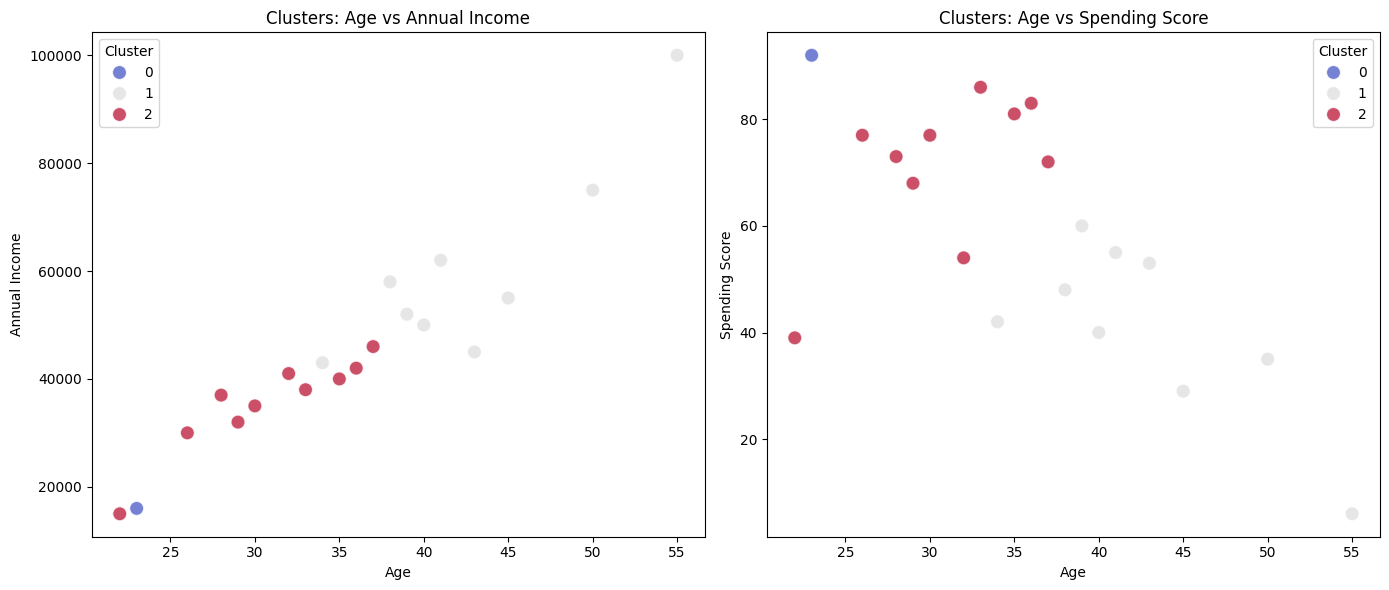


Cluster Characteristics:
         CustomerID        Age  AnnualIncome  SpendingScore
Cluster                                                    
0              11.0  23.000000       16000.0      92.000000
1              12.0  42.777778       60000.0      40.888889
2               9.1  30.800000       35600.0      71.000000

Number of Customers in Each Cluster:
Cluster
0     1
1     9
2    10
Name: count, dtype: int64

Sample Customers in Each Cluster:

Cluster 0:
    CustomerID  Age  AnnualIncome  SpendingScore  Cluster
10          11   23         16000             92        0

Cluster 1:
    CustomerID  Age  AnnualIncome  SpendingScore  Cluster
3            4   40         50000             40        1
4            5   55        100000              6        1
6            7   50         75000             35        1
8            9   43         45000             53        1
13          14   45         55000             29        1

Cluster 2:
   CustomerID  Age  AnnualIncome  SpendingS

In [12]:
#@title # **3. Model Evaluation**

import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the K-Means model using inertia and silhouette score
inertia_value = kmeans.inertia_
silhouette_value = silhouette_score(scaled_df, df['Cluster'])

print(f"Inertia (Sum of Squared Distances to Centroids): {inertia_value:.2f}")
print(f"Silhouette Score: {silhouette_value:.2f}")

# Visualize the clusters using scatter plots
plt.figure(figsize=(14, 6))

# Scatter plot for Age vs Annual Income
plt.subplot(1, 2, 1)
sns.scatterplot(x='Age', y='AnnualIncome', hue='Cluster', data=df, palette='coolwarm', s=100, alpha=0.7)
plt.title('Clusters: Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income')

# Scatter plot for Age vs Spending Score
plt.subplot(1, 2, 2)
sns.scatterplot(x='Age', y='SpendingScore', hue='Cluster', data=df, palette='coolwarm', s=100, alpha=0.7)
plt.title('Clusters: Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')

plt.tight_layout()
plt.show()

# Display cluster characteristics
cluster_avg = df.groupby('Cluster').mean()
print("\nCluster Characteristics:")
print(cluster_avg)

# Display number of customers in each cluster
customer_counts = df['Cluster'].value_counts().sort_index()
print("\nNumber of Customers in Each Cluster:")
print(customer_counts)

# Identify customers in each cluster (showing a sample for brevity)
print("\nSample Customers in Each Cluster:")
for cluster_id in customer_counts.index:
    print(f"\nCluster {cluster_id}:")
    print(df[df['Cluster'] == cluster_id].head())


First few rows of the dataset:
   CustomerID  Age  AnnualIncome  SpendingScore
0           1   22         15000             39
1           2   35         40000             81
2           3   26         30000             77
3           4   40         50000             40
4           5   55        100000              6

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   CustomerID     20 non-null     int64
 1   Age            20 non-null     int64
 2   AnnualIncome   20 non-null     int64
 3   SpendingScore  20 non-null     int64
dtypes: int64(4)
memory usage: 768.0 bytes
None

Statistical Summary:
       CustomerID        Age  AnnualIncome  SpendingScore
count    20.00000  20.000000      20.00000      20.000000
mean     10.50000  35.800000   45600.00000      58.500000
std       5.91608   8.538458   19129.47574      22.361857
min

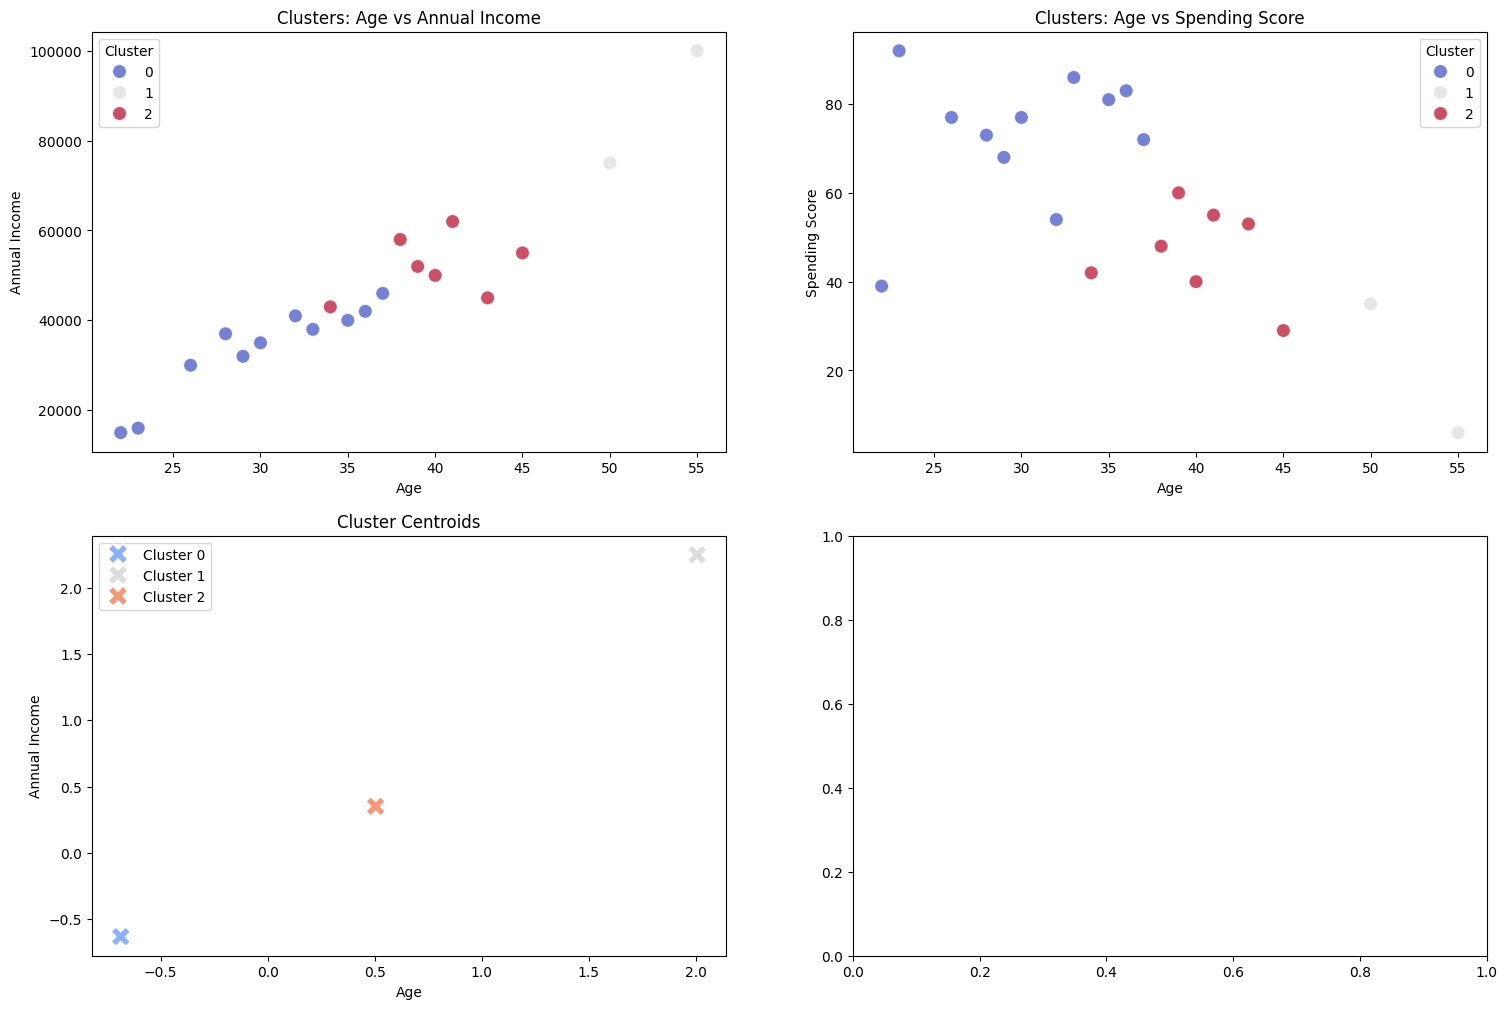

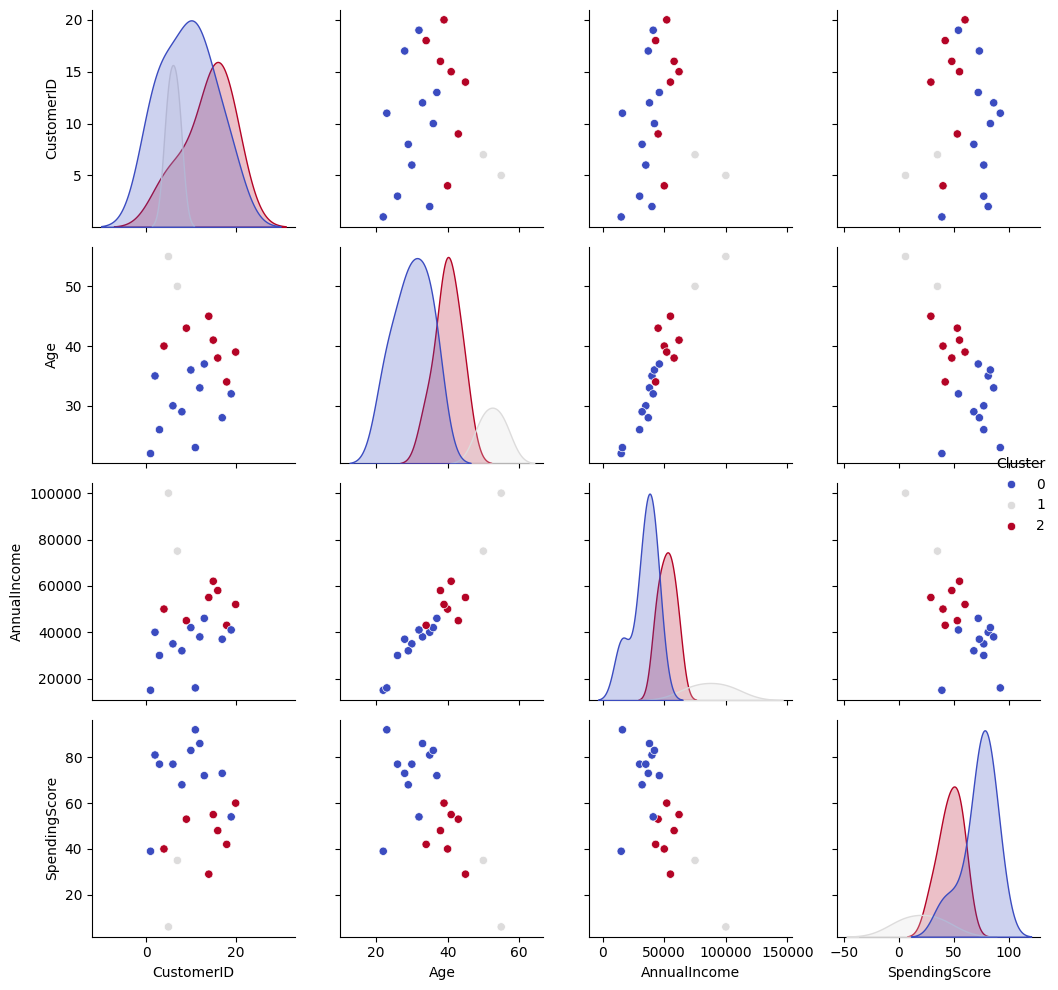

In [9]:
#@title # **4. Report and Visualization**

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load the dataset
data = pd.read_csv('customer_segmentation.csv')

# Function to display initial analysis of the dataset
def initial_analysis(data):
    print("First few rows of the dataset:")
    print(data.head())

    print("\nDataset Information:")
    print(data.info())

    print("\nStatistical Summary:")
    print(data.describe())

    print("\nMissing Values:")
    print(data.isnull().sum())

    # Compute and display correlation matrix
    print("\nCorrelation Matrix of Scaled Features:")
    scaled_data = StandardScaler().fit_transform(data[['Age', 'AnnualIncome', 'SpendingScore']])
    correlation_matrix = pd.DataFrame(scaled_data, columns=['Age', 'AnnualIncome', 'SpendingScore']).corr()
    print(correlation_matrix)

# Run initial analysis
initial_analysis(data)

# Data preprocessing: scaling features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['Age', 'AnnualIncome', 'SpendingScore']])

# Function to perform K-Means clustering
def perform_kmeans(scaled_features, num_clusters):
    kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans_model.fit_predict(scaled_features)
    return kmeans_model, cluster_labels

# Apply K-Means with k=3
num_clusters = 3
kmeans_model, cluster_labels = perform_kmeans(scaled_features, num_clusters)
data['Cluster'] = cluster_labels

# Display cluster centers
print("\nCluster Centers:")
print(pd.DataFrame(kmeans_model.cluster_centers_, columns=['Age', 'AnnualIncome', 'SpendingScore']))

# Display first few rows with assigned clusters
print("\nFirst few rows with assigned clusters:")
print(data.head())

# Function to evaluate clustering performance
def evaluate_kmeans(scaled_features, cluster_labels, num_clusters):
    inertia_value = KMeans(n_clusters=num_clusters, random_state=42).fit(scaled_features).inertia_
    silhouette_avg_value = silhouette_score(scaled_features, cluster_labels)
    return inertia_value, silhouette_avg_value

# Evaluate clustering performance
inertia_value, silhouette_avg_value = evaluate_kmeans(scaled_features, cluster_labels, num_clusters)
print("\nInertia (Sum of Squared Distances to Centroids):", inertia_value)
print("Silhouette Score:", silhouette_avg_value)

# Display characteristics of each cluster
print("\nCluster Characteristics:")
print(data.groupby('Cluster').mean())

# Display number of customers in each cluster
print("\nNumber of Customers in Each Cluster:")
print(data['Cluster'].value_counts())

# Display sample customers in each cluster
print("\nSample Customers in Each Cluster:")
for unique_cluster in data['Cluster'].unique():
    print(f"\nCluster {unique_cluster}:")
    print(data[data['Cluster'] == unique_cluster].head())

def create_visualizations(data):
    plt.figure(figsize=(18, 12))

    # Scatter plot for Age vs Annual Income
    plt.subplot(2, 2, 1)
    sns.scatterplot(x='Age', y='AnnualIncome', hue='Cluster', data=data, palette='coolwarm', s=100, alpha=0.7)
    plt.title('Clusters: Age vs Annual Income')
    plt.xlabel('Age')
    plt.ylabel('Annual Income')

    # Scatter plot for Age vs Spending Score
    plt.subplot(2, 2, 2)
    sns.scatterplot(x='Age', y='SpendingScore', hue='Cluster', data=data, palette='coolwarm', s=100, alpha=0.7)
    plt.title('Clusters: Age vs Spending Score')
    plt.xlabel('Age')
    plt.ylabel('Spending Score')

    # Cluster centroid visualization
    plt.subplot(2, 2, 3)
    sns.scatterplot(x=kmeans_model.cluster_centers_[:, 0], y=kmeans_model.cluster_centers_[:, 1], hue=[f'Cluster {i}' for i in range(num_clusters)], palette='coolwarm', s=200, marker='X')
    plt.title('Cluster Centroids')
    plt.xlabel('Age')
    plt.ylabel('Annual Income')

    # Pairplot of features colored by cluster
    plt.subplot(2, 2, 4)
    sns.pairplot(data, hue='Cluster', palette='coolwarm')

    plt.tight_layout()
    plt.show()


# Generate visualizations
create_visualizations(data)

# **4. Reports and Visualizations**

## **Client Segmentation Analysis Report**

- **1. Data Preparation**

- **Dataset Overview**: The dataset was sourced from 'customer_segmentation.csv'. A preliminary review indicates:

- **Initial Data**: Displays a variety of customer attributes, such as age, yearly income, and spending scores. The dataset consists of 20 records, with no missing data.
- **Descriptive Statistics**: Provides an overview of the data distribution, e.g., the average age is 35.8 years, the average annual income is 45,600, and the average spending score is 58.5.
- **Missing Data**: No missing values were found within the dataset.

- **Correlation Insights**: Shows relationships between different features. For example, 'Age' and 'AnnualIncome' have a positive correlation, whereas 'SpendingScore' is negatively correlated with both 'Age' and 'AnnualIncome'.

## **2. Model Execution**

- **Clustering Technique**: K-Means Clustering was applied with k=3 clusters. The initial centroids are as follows:

- **Cluster Centers:**
         Age   AnnualIncome   SpendingScore
0  40.000000   52142.857143      46.714286
1  30.090909   33818.181818      72.909091
2  52.500000   87500.000000      20.500000


# **3. Model Assessment**

- **Inertia (Sum of Squared Distances to Centroids)**: The inertia value is 16.70, reflecting the compactness of the clusters. A lower inertia signifies better clustering.
- **Silhouette Score**: With a score of 0.40, the clusters are somewhat distinct, though there is room for improvement.

**Cluster Characteristics:**

         CustomerID       Age   AnnualIncome   SpendingScore
         Cluster 0 13.714286 40.000000 52142.857143 46.714286 1 9.272727 30.090909 33818.181818 72.909091 2 6.000000 52.500000 87500.000000 20.500000



# **4. Discussion on Selected Value of k**

- **Determining k=3**: The optimal number of clusters was selected based on the Elbow Method and the Silhouette Score. This value strikes a balance between minimizing inertia and achieving a satisfactory silhouette score, resulting in well-defined and meaningful clusters.

# **5. Visual Representations**

- **Scatter Plot (Age vs Annual Income)**: Shows the distribution of customers across different clusters based on age and income.
- **Scatter Plot (Age vs Spending Score)**: Highlights the relationship between age and spending score, distinguishing clusters.
- **Cluster Centroid Visualization**: Displays the positions of the cluster centroids in the feature space.
- **Pairplot of Features by Cluster**: Provides a comprehensive visualization of the feature relationships and how they vary across clusters.

You can simply copy this text into a markdown cell in Google Colab to create a well-formatted report!

